In [33]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 

In [34]:
def get_position_to_draw(text, point, font_face, font_scale, thickness):
    """Gives the coordinates to draw centers"""

    text_size = cv2.getTextSize(text, font_face, font_scale, thickness)[0]
    text_x = point[0] - text_size[0] /2
    text_y = point[1] + text_size[1] /2

    return round(text_x), round(text_y)

In [35]:
def detect_shape(contour):
    """Returns the shape (e.g. Triangle, Square etc)"""

    detect_shape = '------'

    #calculating PERIMETER
    perimeter = cv2.arcLength(contour, True)

    #getting CONTOUR Approximation
    contour_approx = cv2.approxPolyDP(contour, 0.03 * perimeter, True)

    #check if the NUMBER OF VERTICES = 3
    if len(contour_approx) == 3:
        detect_shape = 'triangle'
    
    #check if NUMBER OF VERTICES =4 
    elif len(contour_approx) == 4:

        #calculate the aspect ratio from the bouding Rect
        x, y, width, height = cv2.boundingRect(contour_approx)
        aspect_ratio = float(width) / height 

        #A square has aspect ratio close to 1
        if 0.90 < aspect_ratio < 1.10:
            detect_shape = 'Square'
        else:
            detect_shape = 'Rectangle'
    
    elif len(contour_approx) == 5:
        detect_shape = 'Pentagon'
    
    elif len(contour_approx) == 6:
        detect_shape = 'Hexagon'

    else:
        detect_shape = 'Circle'

    return detect_shape, contour_approx

In [36]:
def array_to_tuple(arr):

    return tuple(arr.reshape(1, -1)[0])

In [37]:
def draw_contour_points(img, conts, color):
    """Draw all points from a list of Contours"""

    for cont in conts:
        print(cont.shape)
        squeeze = np.squeeze(cont)
        print(squeeze.shape)


        for p in squeeze:
            pp = array_to_tuple(p)
            cv2.circle(img, pp , 10, color, -1)
    
    return img

In [38]:
def draw_contour_outline(img, conts, color, thickness=1):

    for cont in conts:
        cv2.drawContours(img, [cont], 0, color, thickness)

In [39]:
def img_plt(color_img, title, pos):

    img_RGB = color_img[:, :, ::-1]
    ax  = plt.subplot(2, 2, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')

fig = plt.figure(figsize=(12, 9))
plt.rcParams['figure.facecolor'] = 'silver'

<Figure size 864x648 with 0 Axes>

In [40]:
image = cv2.imread("images/shapes.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [41]:
#Thresholding
ret, thresh = cv2.threshold(gray_image, 50, 255, cv2.THRESH_BINARY)

#Finding Contour
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Detected Contours: '{}'" .format(len(contours)))

Detected Contours: '6'


In [42]:
image_contours = image.copy()
image_recognition_shapes = image.copy()

In [43]:
draw_contour_outline(image_contours, contours, (255, 255, 255), 4)

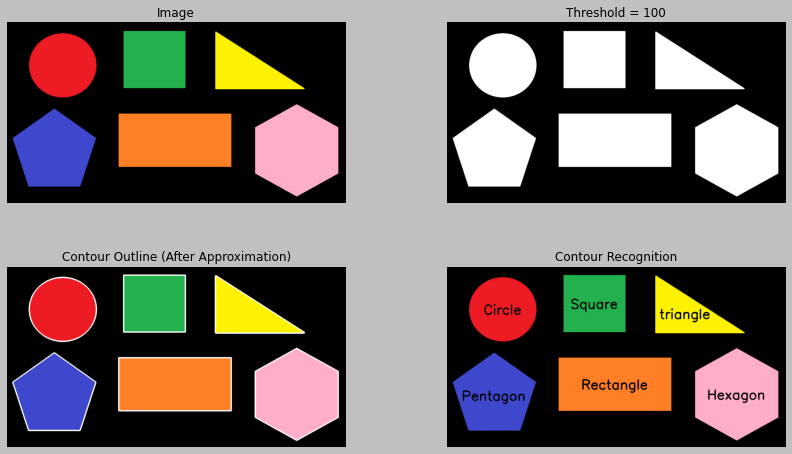

In [44]:
for contour in contours:

    #computing the moments of the current contour
    M = cv2.moments(contour)

    #calculating the centroid of the contour from the moments
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])

    #Detect shape of the current contour:
    shape, vertices = detect_shape(contour)

    #getting the position to DRAW
    (x, y) = get_position_to_draw(shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 1.6, 3)

    #Writing the name of SHAPE
    cv2.putText(image_recognition_shapes, shape, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1.6, (0, 0, 0), 3)

img_plt(image, "Image", 1)
img_plt(cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR), "Threshold = 100", 2)
img_plt(image_contours, "Contour Outline (After Approximation)", 3)
img_plt(image_recognition_shapes, "Contour Recognition", 4)

plt.subplots_adjust(top=3,bottom=1.5, right=2, left=0.2, wspace=0.3, hspace=0.3)
plt.show()